## Bot vs Human account detection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
train_df = pd.read_csv('data/train/train.csv', delimiter=';',
                           encoding='utf8', engine='python')

bots = train_df[train_df['bot']==1]
nonbots = train_df[train_df['bot']==0]

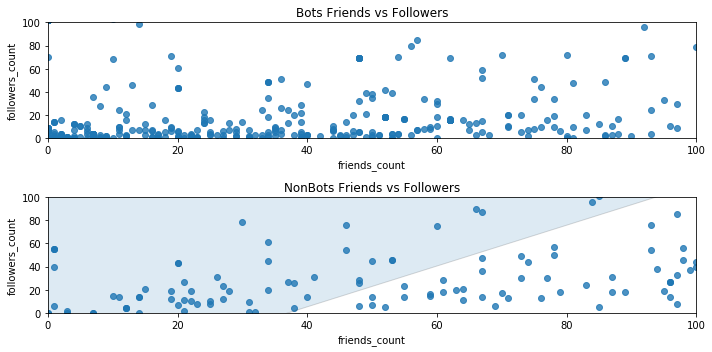

In [8]:
bots.friends_count/bots.followers_count

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers')
sns.regplot(bots.friends_count, bots.followers_count, label='Bots')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('NonBots Friends vs Followers')
sns.regplot(nonbots.friends_count, nonbots.followers_count, label='NonBots')
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

(926, 35)


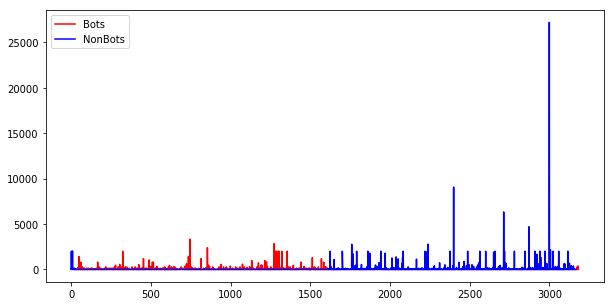

In [12]:
plt.figure(figsize=(10,5))
plt.plot(bots.listed_count, color='red', label='Bots')
plt.plot(nonbots.listed_count, color='blue', label='NonBots')
plt.legend(loc='upper left')
print(bots[(bots.listed_count<5)].shape)

In [14]:
bots_listed_count_df = bots[bots.listed_count<16000]
nonbots_listed_count_df = nonbots[nonbots.listed_count<16000]

bots_verified_df = bots_listed_count_df[bots_listed_count_df.is_verified==False]
bots_screenname_has_bot_df_ = bots_verified_df[(bots_verified_df.screen_name.str.contains("bot", case=False)==True)].shape

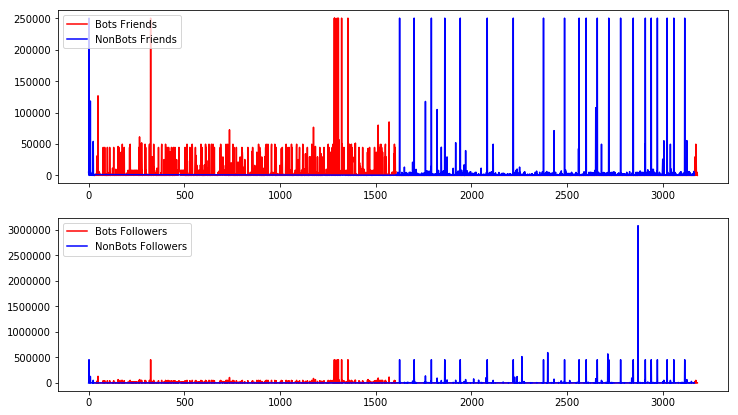

In [15]:
plt.figure(figsize=(12,7))

plt.subplot(2,1,1)
plt.plot(bots_listed_count_df.friends_count, color='red', label='Bots Friends')
plt.plot(nonbots_listed_count_df.friends_count, color='blue', label='NonBots Friends')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.plot(bots_listed_count_df.followers_count, color='red', label='Bots Followers')
plt.plot(nonbots_listed_count_df.followers_count, color='blue', label='NonBots Followers')
plt.legend(loc='upper left')

### Feature Independence using Spearman correlation

In [56]:
train_df.corr(method='spearman')

,geo_country,geo_coordinates,total_number_of_tweets,followers_count,friends_count,retweets_count,favorite_count,listed_count,bot,id,screen_name_binary,name_binary,description_binary,tweet_binary,screen_name_list,listed_count_binary
geo_country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geo_coordinates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_number_of_tweets,NaN,NaN,1.000000,0.772492,0.640130,-0.044885,0.017356,0.768691,-0.165102,-0.023574,-0.056440,-0.041981,0.188663,0.017448,NaN,-0.027005
followers_count,NaN,NaN,0.772492,1.000000,0.860254,-0.116647,0.163823,0.825308,-0.106808,0.027483,-0.092734,-0.070373,0.232845,-0.078043,NaN,-0.030716
friends_count,NaN,NaN,0.640130,0.860254,1.000000,-0.108620,0.142785,0.686020,-0.068250,0.023167,-0.205693,-0.173916,0.207516,-0.097432,NaN,-0.002523
retweets_count,NaN,NaN,-0.044885,-0.116647,-0.108620,1.000000,-0.302241,-0.123040,-0.265537,0.014468,-0.026033,-0.021760,-0.223593,0.285083,NaN,-0.004068
favorite_count,NaN,NaN,0.017356,0.163823,0.142785,-0.302241,1.000000,0.113119,0.030269,-0.012245,-0.052965,-0.043011,0.126003,-0.096215,NaN,-0.050650
listed_count,NaN,NaN,0.768691,0.825308,0.686020,-0.123040,0.113119,1.000000,-0.091899,0.032927,-0.084917,-0.064939,0.184202,-0.042390,NaN,-0.031193
bot,NaN,NaN,-0.165102,-0.106808,-0.068250,-0.265537,0.030269,-0.091899,1.000000,0.139650,0.091321,0.085105,0.094118,-0.180588,NaN,0.017730
id,NaN,NaN,-0.023574,0.027483,0.023167,0.014468,-0.012245,0.032927,0.139650,1.000000,0.027969,0.026765,0.033596,-0.022905,NaN,-0.000299


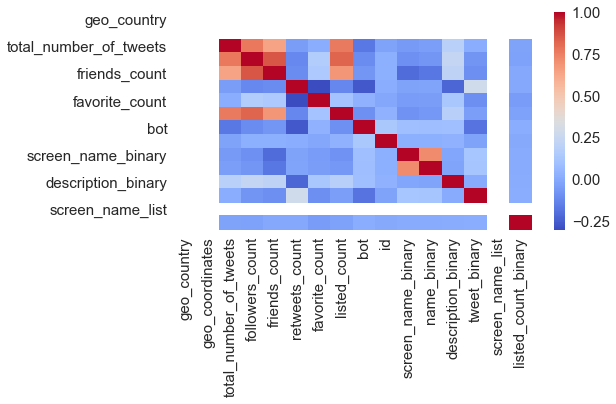

In [57]:
plt.figure(figsize=(8,4))
sns.heatmap(train_df.corr(method='spearman'), cmap='coolwarm')
plt.show()

Result:

- There is strong correlation between listed_count, friends_count, total_number_of_tweets, followers_count and target variable.

In [23]:
#filepath = 'https://raw.githubusercontent.com/jubins/ML-TwitterBotDetection/master/FinalCode/kaggle_data/'
train_df = pd.read_csv('data/train/train.csv', delimiter=';',
                           encoding='utf8', engine='python')

listBots = str(pd.read_csv('listBots.csv').values)

bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
            
train_df['screen_name_binary'] = train_df.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
train_df['name_binary'] = train_df.name.str.contains(bag_of_words_bot, case=False, na=False)
train_df['description_binary'] = train_df.profile_description.str.contains(bag_of_words_bot, case=False, na=False)
train_df['tweet_binary'] = train_df.tweet_full.str.contains(bag_of_words_bot, case=False, na=False)
train_df['screen_name_list'] = train_df.screen_name.str.contains(listBots, case=False, na=False)

In [24]:
train_df['listed_count_binary'] = (train_df.listed_count>20000)==False
features = ['screen_name_binary', 'name_binary', 'description_binary', 'tweet_binary', 'followers_count', 'friends_count', 'total_number_of_tweets', 'listed_count_binary', 'bot','screen_name_list']

## Decision Tree Classifier and Random Forest

#### Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

X = train_df[features].iloc[:,:-1]
y = train_df[features].iloc[:,-1]
#print(X)
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

dt = dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Training Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.6824
Test Accuracy: 0.6540


#### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

X = train_df[features].iloc[:,:-1]
y = train_df[features].iloc[:,-1]

rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

rf = rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Training Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.76823
Test Accuracy: 0.73495
